In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import LFPy
import neuron
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import csv
import os
import glob
import pandas as pd

In [6]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)

['all.csv', 'cell_0.csv', 'cell_1.csv', 'cell_2.csv', 'cell_3.csv', 'cell_4.csv', 'cell_5.csv', 'cell_6.csv', 'cell_7.csv', 'cell_8.csv', 'cell_9.csv']


In [7]:
df = pd.read_csv('all.csv', header=None)
pd.options.display.float_format = '{:.8f}'.format
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64001 entries, 0 to 64000
Columns: 148 entries, 0 to 147
dtypes: float64(148)
memory usage: 72.3 MB


,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.03125000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.06250000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,0.09375000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0.12500000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [8]:
lst = df.columns.tolist()
print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [9]:
tvec=df[lst[0]]
print(tvec)

0          0.00000000
1          0.03125000
2          0.06250000
3          0.09375000
4          0.12500000
             ...     
63996   1999.87500000
63997   1999.90625000
63998   1999.93750000
63999   1999.96875000
64000   2000.00000000
Name: 0, Length: 64001, dtype: float64


In [22]:
np.random.seed(1676)
wn = np.random.normal(0.0, 0.05, 64001)

count   64001.00000000
mean       -0.00005096
std         0.04992612
min        -0.20819212
25%        -0.03371297
50%        -0.00011986
75%         0.03340638
max         0.22076954
dtype: float64


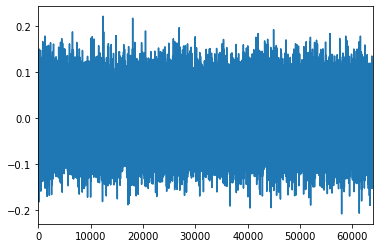

In [23]:
s1=pd.Series(wn)
print(s1.describe())
s1.plot()

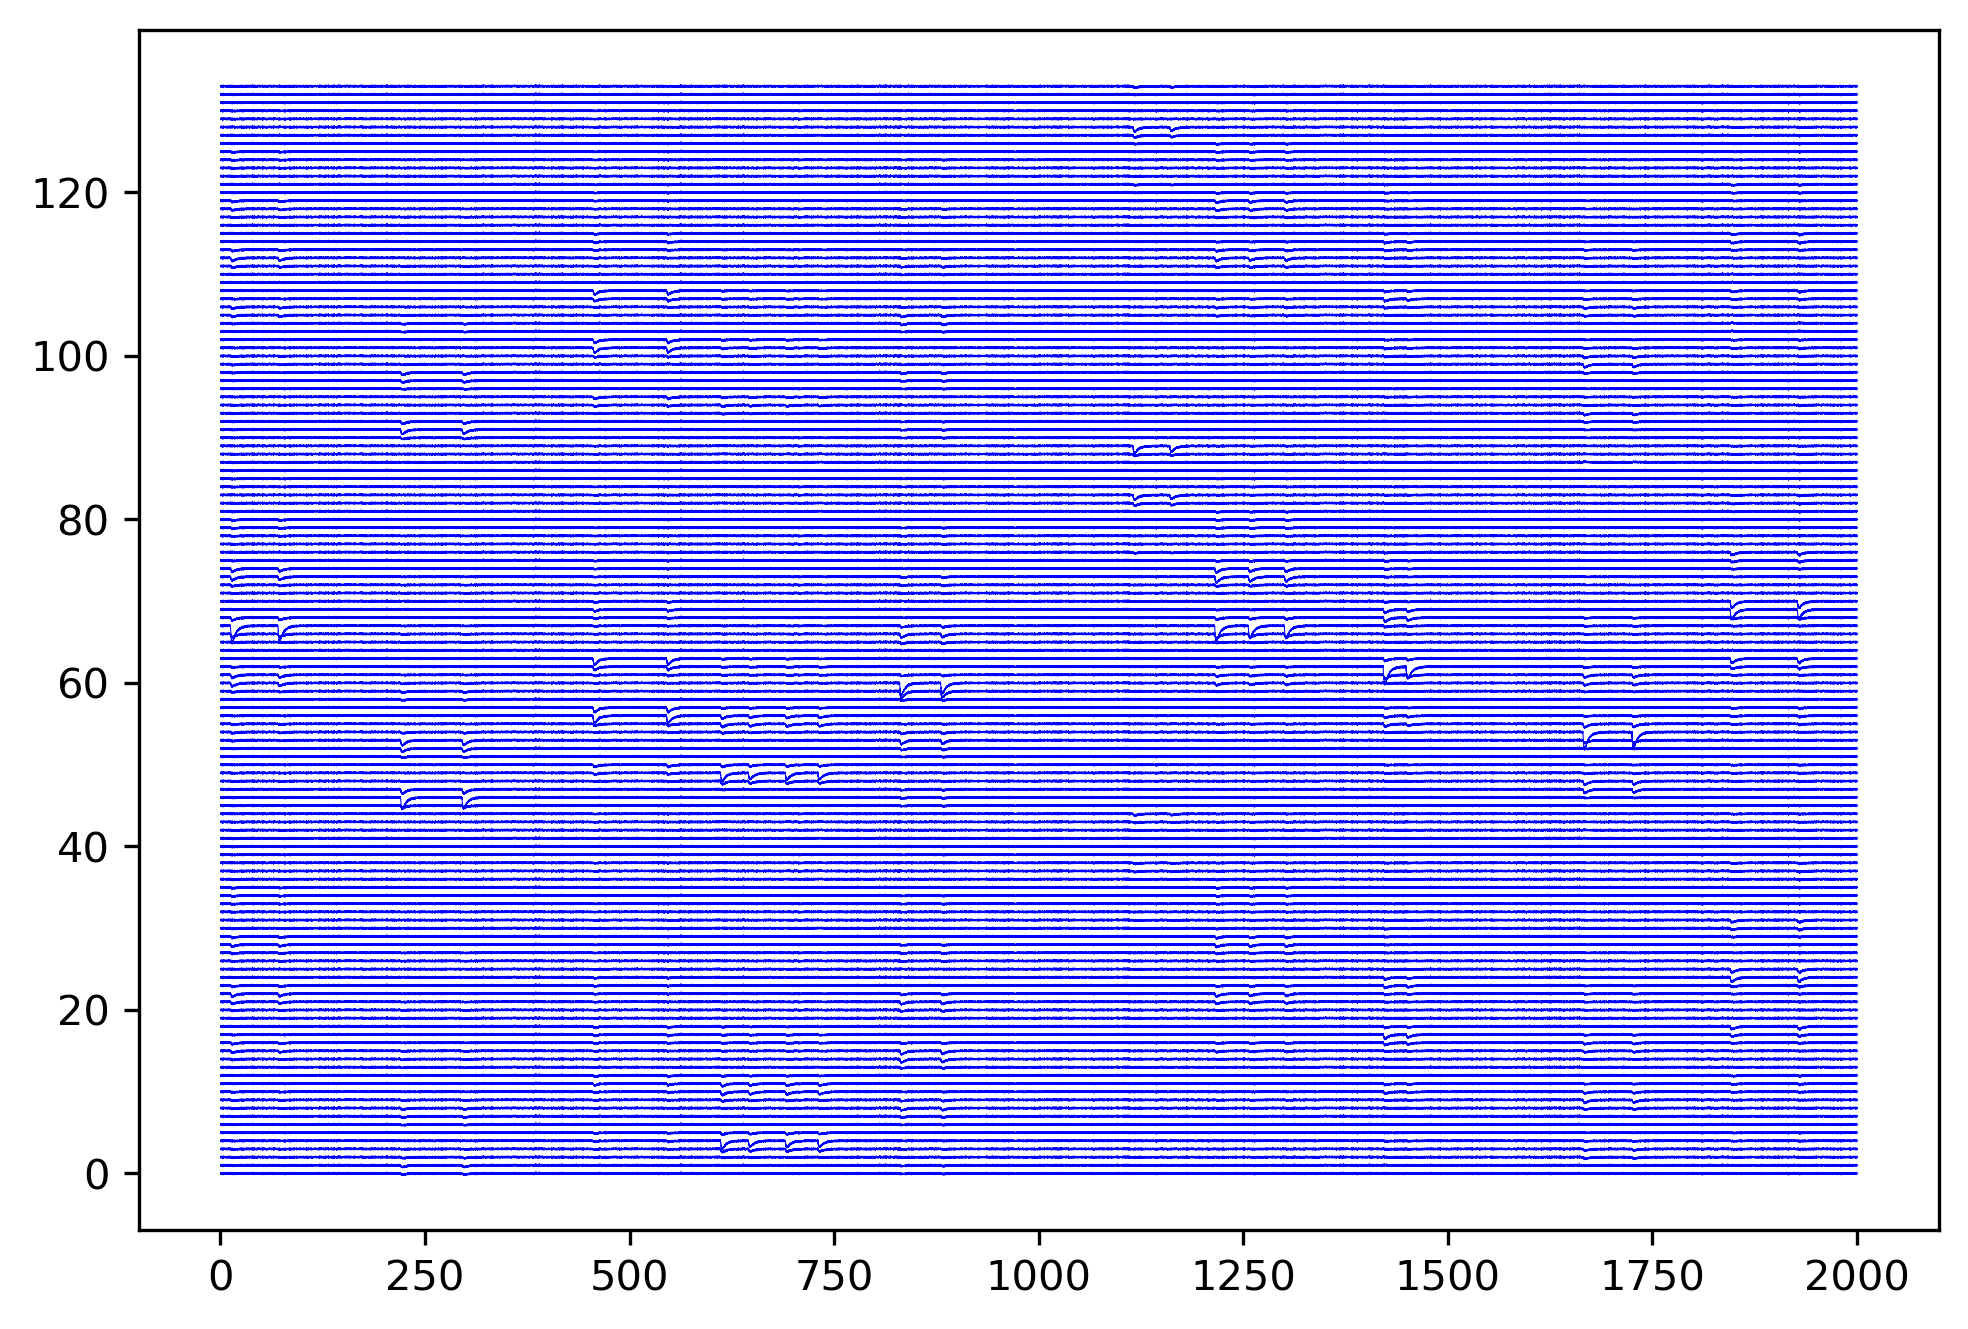

In [24]:
fig = plt.figure(dpi=300)

ax = fig.add_axes([0.0,0.0,1.0,1.0], frameon=True)
i = 0

for s in lst[1:135]:
    #print(s,df[s])
    if abs(df[s]).max() >= 1:
        factor = 2
        color='r'
    elif abs(df[s]).max() < 0.25:
        factor = 50
        color = 'b'
    else:
        factor = 10
        color = 'g'
    trace = df[s]*factor + i + wn
    ax.plot(tvec, trace, color=color, lw = 0.25)
    i += 1